In [1]:
# Example of scaling a number of iterations (e.g., ML iter)
# to the expected range for sigmoid annealing behavior

import numpy as np
from tensorflow.nn import sigmoid
import matplotlib.pyplot as plt

In [2]:
def min_max_scale(cur_val, min_val, max_val, lower_bound=0, upper_bound=1):
    """Min-max scale current value to desired range.
    
    https://en.wikipedia.org/wiki/Feature_scaling
    """

    return lower_bound + ((cur_val - min_val)*(upper_bound-lower_bound))/(max_val - min_val)

In [3]:
symmetric_bound = 50e3
step = 0.5
x = np.arange(symmetric_bound + step, step=step)
print(x.shape)
print(x)

(100001,)
[0.00000e+00 5.00000e-01 1.00000e+00 ... 4.99990e+04 4.99995e+04
 5.00000e+04]


In [4]:
# Scale to range of -6 to 6 since this seems to be ideal for 
# sigmoid range
min_max_scaled_x = np.apply_along_axis(
    min_max_scale, 
    arr=x, 
    axis=0,
    min_val=np.amin(x), 
    max_val=np.amax(x), 
    lower_bound=-6, 
    upper_bound=6)

In [5]:
y = sigmoid(x)

# https://stackoverflow.com/questions/8036878/function-of-numpy-array-with-if-statement
# Convert to negative
x_half_neg = np.choose(x < symmetric_bound/2, [x, -1*x])

# Set range to be in 6
y_scaled = sigmoid(min_max_scaled_x)

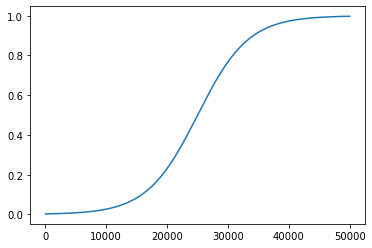

In [6]:
plt.plot(x, y_scaled)

In [7]:
# In order to make the sigmoid shape, make ~1/2 the iterations (x)
# array negative and scale each value by the maximum value of the array
# (i.e., symmetric bound)

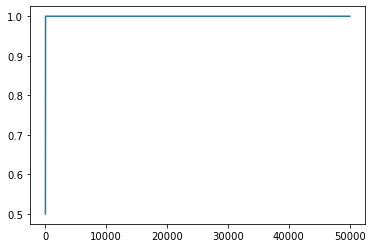

In [8]:
plt.plot(x, y)